# Tutorial 2: Two component system

In tutorial 1 we became acquainted with how to build a database and start analyzing the properties of these systems. In tutorial 2 will look at a more complex system and check some of the conductivity calculations possible currently for two component materials.

In [1]:
import mdsuite as mds
import os

Specifically, we will be looking at molten NaCl at 1400K. We start, as always, with the construction of the database under a new name, NaCl_1400K

In [2]:
NaCl_1400K = mds.Project(analysis_name="NaCl_1400K", 
                           new_project=True,
                          storage_path=".",
                          temperature=1400.0,
                          time_step=0.002,
                          time_unit=1e-12,
                          filename="trajectory_files/NaCl_1400K.dump",
                          length_unit=1e-10)

100%|██████████| 1/1 [00:00<00:00,  8.37it/s]

Beginning Build database



 ** Database has been constructed and saved for NaCl_1400K ** 



First, let's unwrap the coordinates in order to plot some msd characteristics

In [3]:
NaCl_1400K.unwrap_coordinates()


 --- Beginning to unwrap coordinates --- 


 --- Finished unwrapping coordinates --- 



The first point of dynamics analysis is usually the self diffusion, now of course, we have two components, so let's see how the program will handle this.

100%|██████████| 32/32 [00:00<00:00, 25667.95it/s]


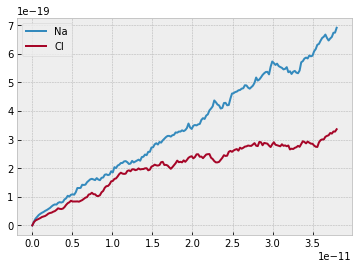

Einstein Self-Diffusion Coefficients:

Na: 1.6928102758794975e-08 m^2/s

Cl: 7.393065005039924e-09 m^2/s



In [4]:
NaCl_1400K.einstein_diffusion_coefficients(plot=True)

If you only want to look at a single component, one simply needs to include the keyword argument as follows

100%|██████████| 32/32 [00:00<00:00, 25900.76it/s]


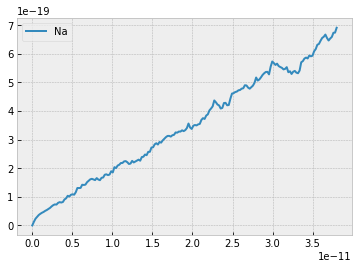

Einstein Self-Diffusion Coefficients:

Na: 1.6928102758794975e-08 m^2/s

Cl: 7.393065005039924e-09 m^2/s



In [5]:
NaCl_1400K.einstein_diffusion_coefficients(plot=True, species=["Na"])

So you can see that we will get only a single analysis performed.

We can also calculate the same property using the GK approach discussed in tutorial 1. Keep in mind that this simulation data is highly inappropriate for such a calculation.

100%|██████████| 100/100 [00:00<00:00, 128.26it/s]


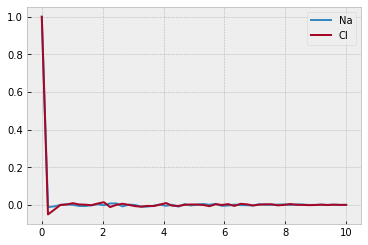

  0%|          | 0/100 [00:00<?, ?it/s]

Self-Diffusion Coefficient for Na at 1400.0K: 4.642734936329827e-08 m^2/s
Self-Diffusion Coefficient for Cl at 1400.0K: 2.9053085454811842e-08 m^2/s
Please note, distinct diffusion coefficients are not currently accurate


100%|██████████| 100/100 [00:23<00:00,  4.26it/s]


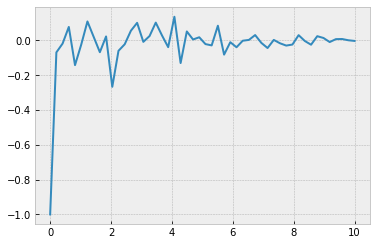

100%|██████████| 100/100 [00:24<00:00,  4.14it/s]


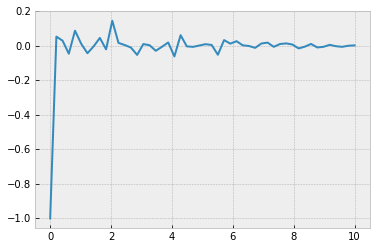

100%|██████████| 100/100 [00:23<00:00,  4.26it/s]


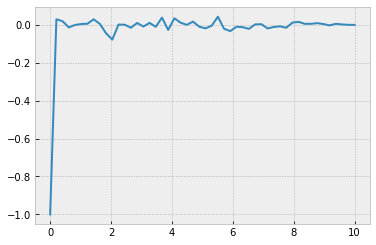

Distinct-Diffusion Coefficient for Na-Na at 1400.0K: [-5.9445162081475715e-08, 1.5038004881352773e-20] m^2/s
Distinct-Diffusion Coefficient for Na-Cl at 1400.0K: [-2.0463766566322296e-08, 8.439892292645776e-21] m^2/s
Distinct-Diffusion Coefficient for Cl-Cl at 1400.0K: [-4.3671965325634935e-08, 3.836205201182477e-21] m^2/s


In [6]:
NaCl_1400K.green_kubo_diffusion_coefficients(plot=True, data_range=50, singular=True, distinct=True)

So you can see that this value is much larger than what we would expect based on the Einstein approach taken above.

The other dynamic property of interest in many investigations is the ionic conductivity. For a fully uncorrelated system, this is trivially possible through the Nernst-Einstein relation, calculated in this code by simply running the Nernst-Einstein method. This method will automatically take care of deciding which implementations are possible. As it is not a computationally complicated calculation, there is not user override. 

In [7]:
NaCl_1400K.nernst_einstein_conductivity()

Nernst-Einstein Conductivity from Einstein Diffusion: 12.982940019424325 S/cm
Nernst-Einstein Conductivity from Green-Kubo Diffusion: 47.2211070816998 S/cm


This approach however, neglects all correlation between the ionic species that may be present in the system. To account for this, we can run either the Einstein-Helfand analysis, or the Green-Kubo autocorrelation analysis to calculate this value. You must note that the simulation being used in this tutorial is very small and very short, therefore, the results that are to be shown will be inconsistent with each other, and with reality.

100%|██████████| 91/91 [00:00<00:00, 41622.86it/s]


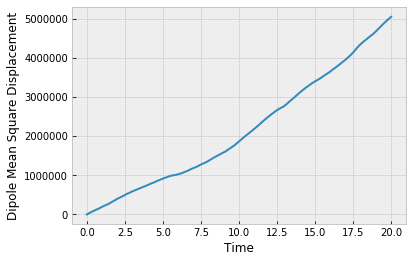

Einstein-Helfand Conductivity at 1400.0K: 24.038311505661216 +- 0.6766503196156026 S/cm


In [8]:
NaCl_1400K.einstein_helfand_conductivity(data_range=100, plot=True)

The error in this analysis comes by fitting a line over various ranges of the linear region and averaging over the calculated gradients

100%|██████████| 39/39 [00:00<00:00, 2407.82it/s]


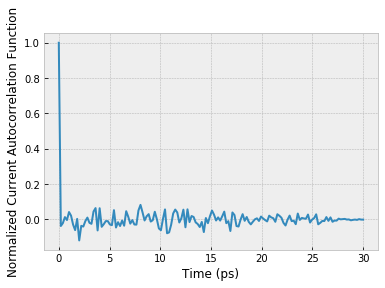

Green-Kubo Ionic Conductivity at 1400.0K: 29.172226864783266 +- 1.4108163542558056 S/cm


In [9]:
NaCl_1400K.green_kubo_conductivity(plot=True, data_range=150)

You can see in particular for the Green-Kubo that the data is highly inappropriate for this kind of analysis. Nonetheless, it can be performed. The issue with the trajectory is that it was sampled every 100 time steps, therefore, the GK approach will often fail as the resolution is too poor.